In [1]:
import numpy as np 
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/buku/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import re
from PIL import Image
import requests
import random
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

In [4]:
books=pd.read_csv("../buku/data/books_data.csv")
books.head(10)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0
6,The Overbury affair (Avon),NaN,['Miriam Allen De Ford'],NaN,http://books.google.nl/books?id=mHLTngEACAAJ&d...,NaN,1960,http://books.google.nl/books?id=mHLTngEACAAJ&d...,NaN,NaN
7,A Walk in the Woods: a Play in Two Acts,NaN,['Lee Blessing'],NaN,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,1988,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,3.0
8,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,['Mary Fabyan Windeatt'],http://books.google.com/books/content?id=lmLqA...,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,Tan Books & Pub,2009-01-01,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,['Biography & Autobiography'],NaN
9,Rising Sons and Daughters: Life Among Japan's ...,Wardell recalls his experience as a foreign st...,['Steven Wardell'],NaN,http://books.google.nl/books?id=rbLZugEACAAJ&d...,Plympton PressIntl,1995,http://books.google.nl/books?id=rbLZugEACAAJ&d...,['Social Science'],NaN


In [5]:
ratings=pd.read_csv("../buku/data/Books_rating.csv")
ratings.head(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
5,0826414346,Dr. Seuss: American Icon,NaN,A2F6NONFUDB6UK,Malvin,2/2,4.0,1127174400,One of America's greatest creative talents,"""Dr. Seuss: American Icon"" by Philip Nel is a ..."
6,0826414346,Dr. Seuss: American Icon,NaN,A14OJS0VWMOSWO,Midwest Book Review,3/4,5.0,1100131200,A memorably excellent survey of Dr. Seuss' man...,Theodor Seuss Giesel was best known as 'Dr. Se...
7,0826414346,Dr. Seuss: American Icon,NaN,A2RSSXTDZDUSH4,J. Squire,0/0,5.0,1231200000,Academia At It's Best,When I recieved this book as a gift for Christ...
8,0826414346,Dr. Seuss: American Icon,NaN,A25MD5I2GUIW6W,"J. P. HIGBED ""big fellow""",0/0,5.0,1209859200,And to think that I read it on the tram!,Trams (or any public transport) are not usuall...
9,0826414346,Dr. Seuss: American Icon,NaN,A3VA4XFS5WNJO3,Donald Burnside,3/5,4.0,1076371200,Fascinating account of a genius at work,"As far as I am aware, this is the first book-l..."


In [6]:
print("Books Shape: " ,books.shape )
print("Ratings Shape: " ,ratings.shape )
# print("Users Shape: " ,users.shape )

Books Shape:  (212404, 10)
Ratings Shape:  (3000000, 10)


In [7]:
print("Any null values in Books:\n" ,books.isnull().sum())
print("Any null values in Ratings:\n ",ratings.isnull().sum())

Any null values in Books:
 Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64
Any null values in Ratings:
  Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561886
review/helpfulness          0
review/score                0
review/time                 0
review/summary             38
review/text                 8
dtype: int64


# PREPROSESSING

In [8]:
books_data=books.merge(ratings)
books_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Id,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,1882931173,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [9]:
books_data = books_data.reindex(columns=["Id", "Title", "description", "authors", "image", "previewLink", "publisher", "publishedDate", "infoLink", "categories", "ratingsCount", "User_id", "profilName", "review/score"])
books_data.head(3)

,Id,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,User_id,profilName,review/score
0,1882931173,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,AVCGYZL8FQQTD,NaN,4.0
1,0826414346,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,A30TK6U7DNS82R,NaN,5.0
2,0826414346,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,A3UH4UZ4RSVO82,NaN,5.0


In [23]:
df=books_data.copy()
# df.dropna(inplace=True)
df.drop(columns=["Id","description","previewLink","previewLink","publishedDate","ratingsCount","infoLink","profilName",],axis=1,inplace=True)
# df.drop(index=df[df["review/score"]==0].index,inplace=True)
# df["Title"]=df["Title"].apply(lambda x: re.sub("[\W_]+"," ",x).strip())
df.head(15)

,Title,authors,image,publisher,categories,User_id,review/score
0,Its Only Art If Its Well Hung!,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,NaN,['Comics & Graphic Novels'],AVCGYZL8FQQTD,4.0
1,Dr. Seuss: American Icon,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,A&C Black,['Biography & Autobiography'],A30TK6U7DNS82R,5.0
2,Dr. Seuss: American Icon,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,A&C Black,['Biography & Autobiography'],A3UH4UZ4RSVO82,5.0
3,Dr. Seuss: American Icon,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,A&C Black,['Biography & Autobiography'],A2MVUWT453QH61,4.0
4,Dr. Seuss: American Icon,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,A&C Black,['Biography & Autobiography'],A22X4XUPKF66MR,4.0
5,Dr. Seuss: American Icon,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,A&C Black,['Biography & Autobiography'],A2F6NONFUDB6UK,4.0
6,Dr. Seuss: American Icon,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,A&C Black,['Biography & Autobiography'],A14OJS0VWMOSWO,5.0
7,Dr. Seuss: American Icon,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,A&C Black,['Biography & Autobiography'],A2RSSXTDZDUSH4,5.0
8,Dr. Seuss: American Icon,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,A&C Black,['Biography & Autobiography'],A25MD5I2GUIW6W,5.0
9,Dr. Seuss: American Icon,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,A&C Black,['Biography & Autobiography'],A3VA4XFS5WNJO3,4.0


# POPULARITY BASED RECOMMENDATION SYSTEM

In [24]:
def popular_books(df,n=100):
    rating_count=df.groupby("Title").count()["review/score"].reset_index()
    rating_count.rename(columns={"review/score":"NumberOfVotes"},inplace=True)
    
    rating_average=df.groupby("Title")["review/score"].mean().reset_index()
    rating_average.rename(columns={"review/score":"AverageRatings"},inplace=True)
    
    popularBooks=rating_count.merge(rating_average,on="Title")
    
    def weighted_rate(x):
        v=x["NumberOfVotes"]
        R=x["AverageRatings"]
        
        return ((v*R) + (m*C)) / (v+m)
    
    C=popularBooks["AverageRatings"].mean()
    m=popularBooks["NumberOfVotes"].quantile(0.90)
    
    popularBooks=popularBooks[popularBooks["NumberOfVotes"] >=250]
    popularBooks["Popularity"]=popularBooks.apply(weighted_rate,axis=1)
    popularBooks=popularBooks.sort_values(by="Popularity",ascending=False)
    return popularBooks[["Title","NumberOfVotes","AverageRatings","Popularity"]].reset_index(drop=True).head(n)

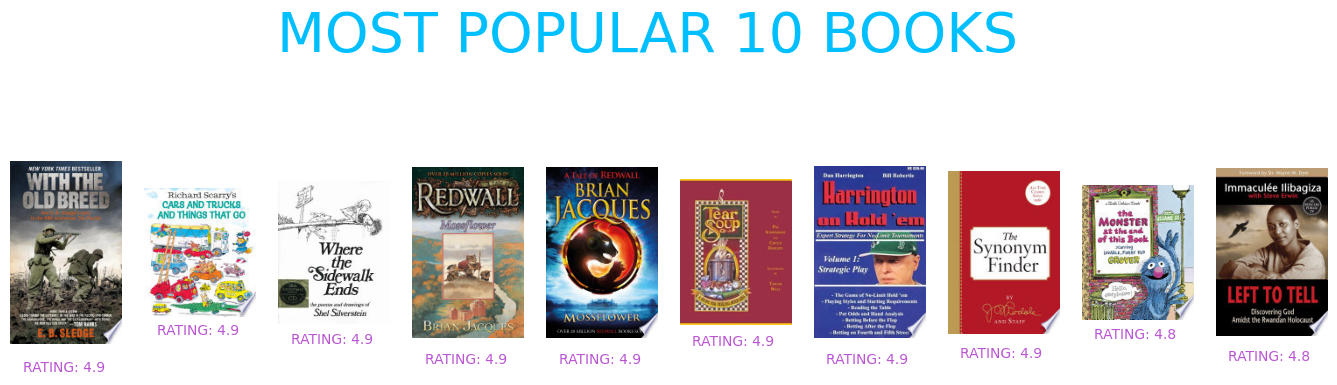

In [25]:
n=10
top_ten=pd.DataFrame(popular_books(df,10))
fig,ax=plt.subplots(1,10,figsize=(17,5))
fig.suptitle("MOST POPULAR 10 BOOKS",fontsize=40,color="deepskyblue")
for i in range(len(top_ten["Title"].tolist())):
    url=df.loc[df["Title"]==top_ten["Title"].tolist()[i],"image"][:1].values[0]
    img=Image.open(requests.get(url,stream=True).raw)
    ax[i].imshow(img)
    ax[i].axis("off")
    ax[i].set_title("RATING: {} ".format(round(df[df["Title"]==top_ten["Title"].tolist()[i]]["review/score"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=10)
    fig.show()

# ITEM-BASED COLLABORATIVE FILTERING

In [26]:
def item_based(bookTitle):
    bookTitle=str(bookTitle)
    
    if bookTitle in df["Title"].values:
        rating_count=pd.DataFrame(df["Title"].value_counts())
        rare_books=rating_count[rating_count["Title"]<=900].index
        common_books=df[~df["Title"].isin(rare_books)]
        
        if bookTitle in rare_books:
            most_common=pd.Series(common_books["Title"].unique()).sample(3).values
            print("No Recommendations for this Book ☹️ \n ")
            print("YOU MAY TRY: \n ")
            print("{}".format(most_common[0]), "\n")
            print("{}".format(most_common[1]), "\n")
            print("{}".format(most_common[2]), "\n")
        else:
            common_books_pivot=common_books.pivot_table(index=["User_id"],columns=["Title"],values="review/score")
            title=common_books_pivot[bookTitle]
            recommendation_df=pd.DataFrame(common_books_pivot.corrwith(title).sort_values(ascending=False)).reset_index(drop=False)
            
            if bookTitle in [title for title in recommendation_df["Title"]]:
                recommendation_df=recommendation_df.drop(recommendation_df[recommendation_df["Title"]==bookTitle].index[0])
                
            less_rating=[]
            for i in recommendation_df["Title"]:
                if df[df["Title"]==i]["review/score"].mean() < 5:
                    less_rating.append(i)
            if recommendation_df.shape[0] - len(less_rating) > 5:
                recommendation_df=recommendation_df[~recommendation_df["Title"].isin(less_rating)]
                
            recommendation_df=recommendation_df[0:5]
            recommendation_df.columns=["Title","Correlation"]
            
            fig, ax = plt.subplots(1,5,figsize=(17,5))
            fig.suptitle("WOULD YOU LIKE to TRY THESE BOOKS?",fontsize=40,color="deepskyblue")
            for i in range(len(recommendation_df["Title"].tolist())):
                url=df.loc[df["Title"]==recommendation_df["Title"].tolist()[i],"image"][:1].values[0]
                img=Image.open(requests.get(url,stream=True).raw)
                ax[i].imshow(img)
                ax[i].axis("off")
                ax[i].set_title("RATING: {} ".format(round(df[df["Title"]==recommendation_df["Title"].tolist()[i]]["review/score"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=22)
                fig.show()
    else:
        print("❌ COULD NOT FIND ❌")

In [27]:
item_based("The Synonym Finder")

No Recommendations for this Book ☹️ 
 
YOU MAY TRY: 
 
Harry Potter and The Sorcerer's Stone 

Path of Daggers (Wheel of Time 08) 

Watership Down 



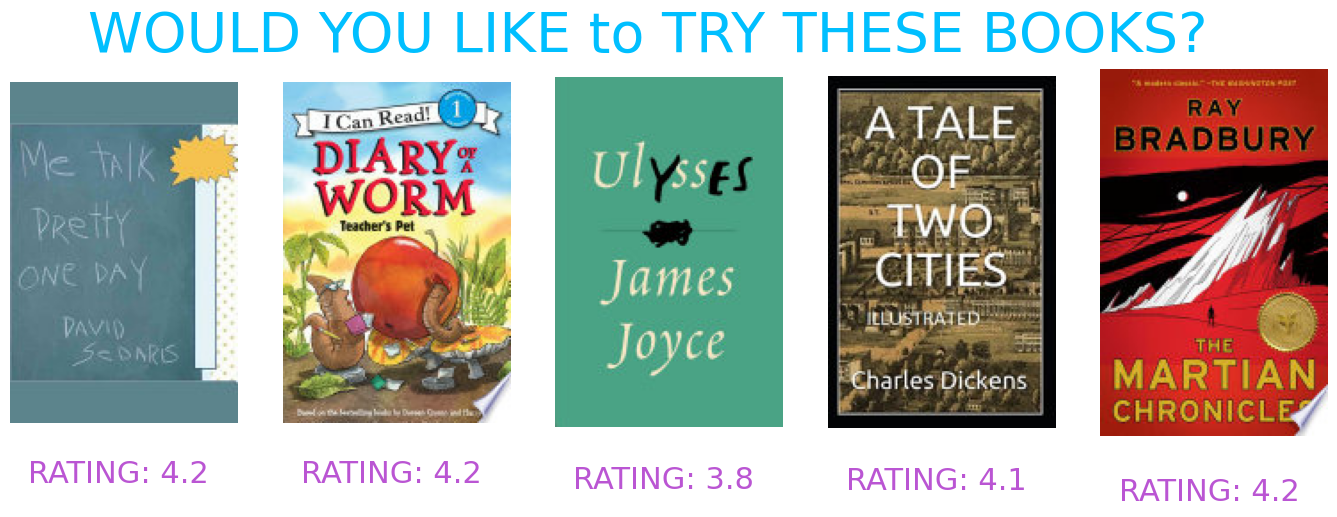

In [28]:
item_based("Me Talk Pretty One Day")

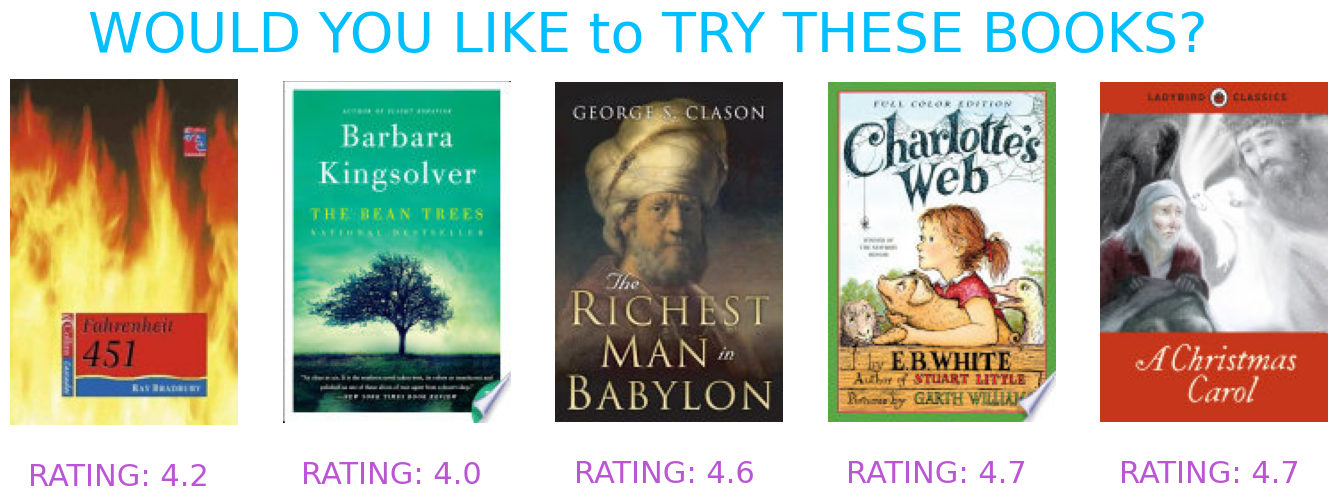

In [55]:
item_based('Fahrenheit 451')

# CONTENT-BASED COLLABORATIVE FILTERING

In [86]:
def content_based(bookTitle):
    bookTitle=str(bookTitle)
    
    if bookTitle in df["Title"].values:
        rating_count=pd.DataFrame(df["Title"].value_counts())
        rare_books=rating_count[rating_count["Title"]<=3000].index
        common_books=df[~df["Title"].isin(rare_books)]
        
        if bookTitle in rare_books:
            most_common=pd.Series(common_books["Title"].unique()).sample(3).values
            print("No Recommendations for this Book ☹️ \n ")
            print("YOU MAY TRY: \n ")
            print("{}".format(most_common[0]), "\n")
            print("{}".format(most_common[1]), "\n")
            print("{}".format(most_common[2]), "\n")
        else:
            common_books=common_books.drop_duplicates(subset=["Title"])
            common_books.reset_index(inplace=True)
            common_books["index"]=[i for i in range(common_books.shape[0])]
            targets=["Title","authors","publisher"]
            common_books["all_features"] = [" ".join(common_books[targets].iloc[i,].values) for i in range(common_books[targets].shape[0])]
            vectorizer=CountVectorizer()
            common_booksVector=vectorizer.fit_transform(common_books["all_features"])
            similarity=cosine_similarity(common_booksVector)
            index=common_books[common_books["Title"]==bookTitle]["index"].values[0]
            similar_books=list(enumerate(similarity[index]))
            similar_booksSorted=sorted(similar_books,key=lambda x:x[1],reverse=True)[1:6]
            books=[]
            for i in range(len(similar_booksSorted)):
                
                books.append(common_books[common_books["index"]==similar_booksSorted[i][0]]["Title"].item())
            fig,ax=plt.subplots(1,5,figsize=(17,5))
            fig.suptitle("YOU MAY ALSO LIKE THESE BOOKS",fontsize=40,color="chocolate")
                
            for i in range(len(books)):
                
                url=common_books.loc[common_books["Title"]==books[i],"Image"][:1].values[0]
                img=Image.open(requests.get(url,stream=True).raw)
                ax[i].imshow(img)
                ax[i].axis("off")
                ax[i].set_title("RATING: {}".format(round(df[df["Title"]==books[i]]["review/score"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=22)
                fig.show()

    else:
        print("❌ COULD NOT FIND ❌")

In [87]:
content_based('1st to Die: A Novel')

No Recommendations for this Book ☹️ 
 
YOU MAY TRY: 
 
Fahrenheit 451 

Harry Potter and The Sorcerer's Stone 

Gone with the Wind 



In [94]:
content_based("Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson")

❌ COULD NOT FIND ❌


In [89]:
content_based('To Kill a Mockingbird')

No Recommendations for this Book ☹️ 
 
YOU MAY TRY: 
 
The Hobbit; Or, There and Back Again 

Lord of the Flies 

A Tree Grows in Brooklyn 



In [54]:
content_based("The Da Vinci Code")

❌ COULD NOT FIND ❌
